# Ensambles de modelos

# Nuevo ensamble. 7001 mas 4955

In [21]:
import os
import pandas as pd

# 1. DE los zlgbm

carpetas= ['zapo-01-IPC-sinrank+MISMAGIAS-paraenviar', 'zapo-01-IPC-sinrank+MISMAGIAS-v03-paraenviar',
           'zapo-01-UVA-sinrank+MISMAGIAS-v02-paraenviar','zapo-01-IPC-sinrank+MISMAGIAS-v04-paraenviar',
          "zapo-01-IPC-sinrank+MISMAGIAS-v05-paraenviar",'zapo-01-IPC-sinrank+MISMAGIAS-v06-paraenviar' ]
ruta_zlgbm = "/content/buckets/b1/exp/competencia02/zlgbm/PARAENVIAR"
predicciones=[]
for carpeta in carpetas:
    dfzlgbm = pd.read_csv(f'{ruta_zlgbm}/{carpeta}/prediccion.txt', sep='\t')
    dfzlgbm['modelo']=carpeta
    predicciones.append(dfzlgbm)
df_total = pd.concat(predicciones, ignore_index=True)

print(df_total)
# 2. Bayesiana
carpeta= 'paraenviar_03_13112025'
ruta_baye = "/content/buckets/b1/exp/competencia02/ENVIAR"
dfbaye = pd.read_csv(f'{ruta_baye}/{carpeta}/prediccion.txt', sep='\t')
dfbaye['modelo']=carpeta
print(dfbaye)

# # 4.Junto y PROMEDIO. PREDICCIÓN 
ensamble_final = pd.concat([df_total, dfbaye], ignore_index=True)

nombres={'zapo-01-IPC-sinrank+MISMAGIAS-paraenviar': 'IPC v1',
        'zapo-01-IPC-sinrank+MISMAGIAS-v03-paraenviar': 'IPC v3',
        'zapo-01-UVA-sinrank+MISMAGIAS-v02-paraenviar': 'UVA',
        'zapo-01-IPC-sinrank+MISMAGIAS-v04-paraenviar': 'IPC v4',
         'zapo-01-IPC-sinrank+MISMAGIAS-v05-paraenviar': 'IPC v5',
         'zapo-01-IPC-sinrank+MISMAGIAS-v06-paraenviar': 'IPC v6',
        'paraenviar_03_13112025': 'OB'}
ensamble_final['modelo']=ensamble_final['modelo'].map(nombres)
# #ensamble_final = pd.merge(left=ensamble_doble, right=df7001, on='numero_de_cliente', how='inner')
# ensamble_final['prob_final'] = (ensamble_final['prob_4955'] + ensamble_final['prob_7001'])/2

# ensamble_final = ensamble_final.sort_values(by='prob_final', ascending=False).reset_index(drop=True)
print(ensamble_final)

        numero_de_cliente  foto_mes      prob  \
0               249221323    202108  0.000879   
1               249227600    202108  0.001302   
2               249234235    202108  0.304698   
3               249244449    202108  0.005388   
4               249244739    202108  0.007449   
...                   ...       ...       ...   
988927         1603549106    202108  0.032777   
988928         1603676578    202108  0.164418   
988929         1603770942    202108  0.114963   
988930         1603816886    202108  0.100573   
988931         1603899149    202108  0.100455   

                                              modelo  
0           zapo-01-IPC-sinrank+MISMAGIAS-paraenviar  
1           zapo-01-IPC-sinrank+MISMAGIAS-paraenviar  
2           zapo-01-IPC-sinrank+MISMAGIAS-paraenviar  
3           zapo-01-IPC-sinrank+MISMAGIAS-paraenviar  
4           zapo-01-IPC-sinrank+MISMAGIAS-paraenviar  
...                                              ...  
988927  zapo-01-IPC-sinran

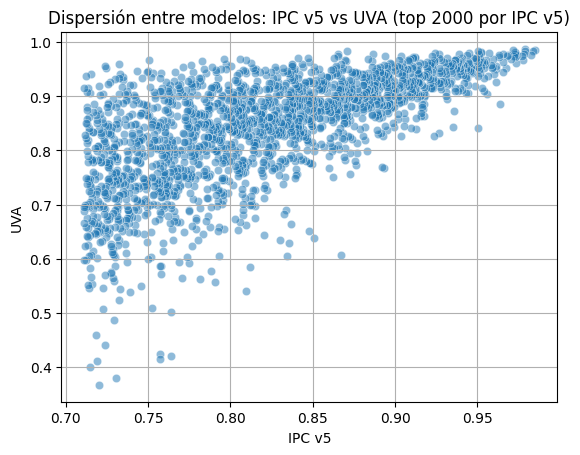

In [22]:
# #Grafiquitos
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Paso 1: seleccionar los dos modelos que querés comparar
# modelo_x = 'IPC v5'
# modelo_y = 'UVA'

# # Paso 2: pivotear el DataFrame para tener columnas por modelo
# df_pivot = ensamble_final.pivot_table(index='numero_de_cliente', columns='modelo', values='prob', aggfunc='mean')

# # Paso 3: filtrar solo los dos modelos
# df_dos = df_pivot[[modelo_x, modelo_y]].dropna()

# # Paso 4: ordenar por el modelo base (por ejemplo, modelo_x) y tomar los primeros 2000
# df_top = df_dos.sort_values(by=modelo_x, ascending=False).head(2000)

# # Paso 5: graficar scatterplot
# sns.scatterplot(data=df_top, x=modelo_x, y=modelo_y, alpha=0.5)
# plt.title(f"Dispersión entre modelos: {modelo_x} vs {modelo_y} (top 2000 por {modelo_x})")
# plt.xlabel(modelo_x)
# plt.ylabel(modelo_y)
# plt.grid(True)
# plt.show()

In [32]:
#Tomo los modelos IPC v3, UVA v2 e IPC v5


#agrupo y hago la media
elegir = ['IPC v3', 'UVA', 'IPC v5']
mis_ensambles = ensamble_final[ensamble_final['modelo'].isin(elegir)]

ensamble_final2 = mis_ensambles.groupby('numero_de_cliente', as_index=False)['prob'].mean()
ensamble_final2 = ensamble_final2.sort_values(by='prob', ascending=False).reset_index(drop=True)
ensamble_final2

ensamble_final2['Prediccion'] = 0  # Inicializa todo a 0
ensamble_final2.loc[0:10999, 'Prediccion'] = 1 
ensamble_final2 = ensamble_final2.loc[ensamble_final2['Prediccion']==1, ['numero_de_cliente']]
print(ensamble_final2.head(10))
print(ensamble_final2.shape)

ensamble_final2.to_csv('/content/buckets/b1/Competencia02/clientes_ensamble3modelos.csv', index=False,header=False)

   numero_de_cliente
0          709048487
1          595282122
2         1323711255
3          598771321
4         1032325045
5         1358960631
6         1248124471
7         1343877265
8          873972753
9          700219427
(11000, 1)
